## The model 5 about Classification model

In [46]:
import warnings
from sklearn.datasets import load_iris

warnings.filterwarnings('ignore')

iris_dataset = load_iris()

In [48]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [53]:
# type of values
type_iris = iris_dataset['target_names']
type_iris

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
iris_dataset['feature_names'], iris_dataset['target'].shape

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 (150,))

In [57]:
iris_dataset['data'].shape

(150, 4)

In [60]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


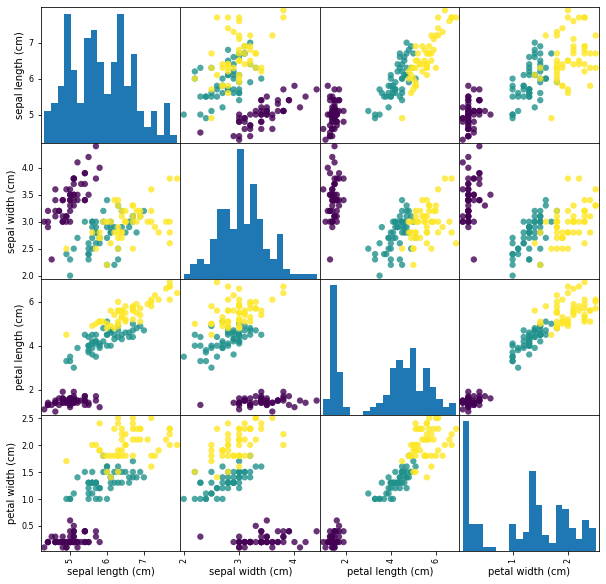

In [70]:
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe,
                                       c=iris_dataset['target'],
                                       figsize=(10, 10),
                                       hist_kwds={'bins': 20},
                                       marker='o',
                                       s=40,
                                       alpha=.8)

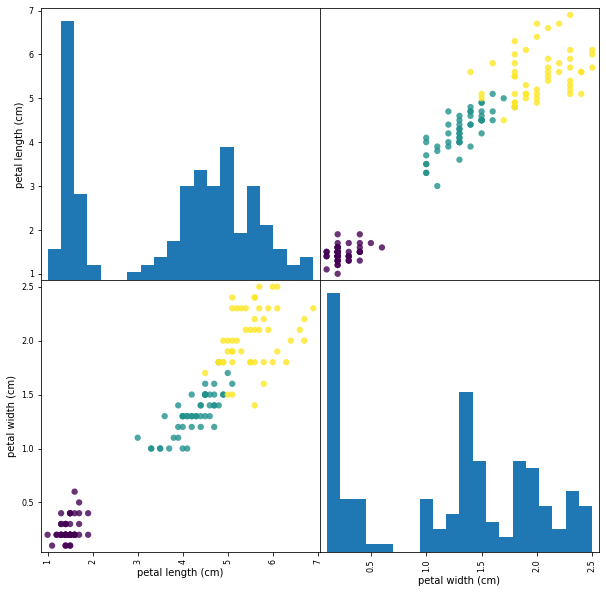

In [77]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4], 
                                                    iris_dataset['target'],
                                                    random_state=0) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [79]:
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)

print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')
pd.DataFrame(x_train_concat).head(5)

X_train shape: (112, 3),
X_test shape: (38, 3)


,0,1,2
0,4.2,1.5,1.0
1,4.0,1.2,1.0
2,5.5,2.1,2.0
3,1.3,0.2,0.0
4,5.1,2.3,2.0


In [84]:
import math

def euclidean_distance(data1, data2):
    distance = 0
    for i in range(len(data1) - 1):
        distance += (data1[i] - data2[i])
    return math.sqrt(distance)

def get_neighbors(train, test, k=1):
    distances = [(train[i])[-1]], euclidean_distance(train[i], test)
    distances.sort(key=lambda elem: elem[1])
    
    neighbors = [distances[i][0] for i in range(k)

In [80]:
predictions = []

for x in range (len(x_test_concat)):
    neighbors = get_neighbors(x_train_concat, x_test_concat[x], k=5)
    print(neighbors)
#     result = prediction(neighbors)
#     predictions.append(result)
# #     print(f'predicted = {result}, actual = {x_test_concat[x][-1]}') # если есть интерес посмотреть, какие конкретно прогнозы некорректны
# accuracy = accuracy(x_test_concat, predictions)
# print(f'Accuracy: {accuracy}')

NameError: name 'get_neighbors' is not defined

## Decision Trees

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data.head()

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0


In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X, y)
clf

DecisionTreeClassifier(criterion='entropy')

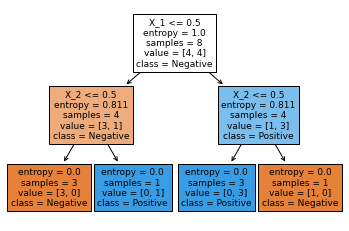

In [8]:
tree.plot_tree(clf, 
               feature_names=X.columns,
               class_names=['Negative', 'Positive'],
               filled=True)
plt.show()

## homework about Decision Tree


In [12]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## KNN - k-nearest neighbors

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() # возвращает объект с несколькими полями

In [5]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(iris_dataset['target'].shape)

(150,)


In [8]:
print(type(iris_dataset['data'])) 
iris_dataset['data'].shape

<class 'numpy.ndarray'>


(150, 4)

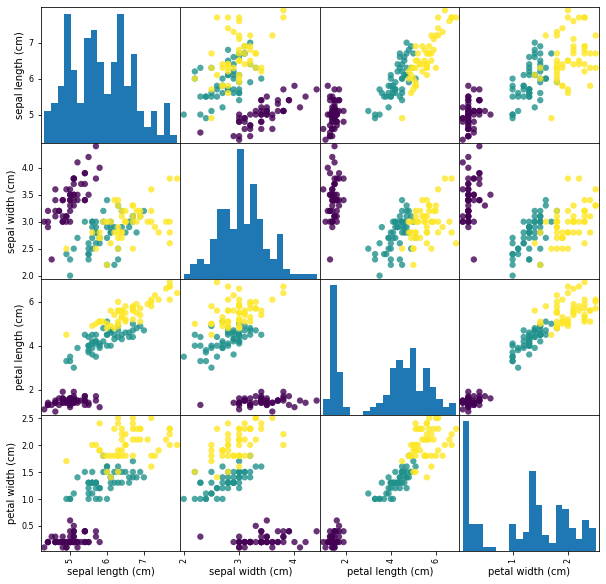

In [9]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

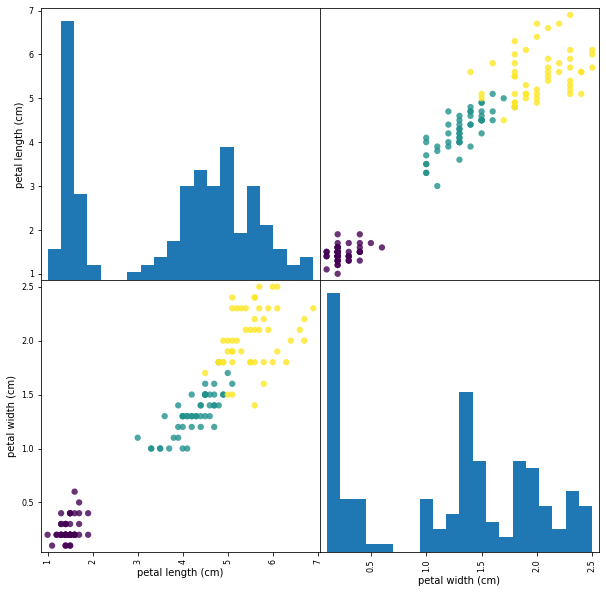

In [10]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4],
                 iris_dataset['target'],
                 random_state=0)
print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [29]:
x_train_concat = np.concatenate((x_train, y_train.reshape(-1, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(-1, 1)), axis=1)

In [34]:
x_train_concat.shape, x_test_concat.shape

((112, 3), (38, 3))

In [107]:
x_train_concat[1][-1]

1.0

In [144]:
import math

def euclidean_distance(data1, data2):
    distance = 0
    for i in range (len(data1) - 1):
        distance += (data1[i] - data2[i]) ** 2
    return math.sqrt(distance)

def get_neighbors(train, test, k=1):
    distances = [(train[i][-1], euclidean_distance(train[i], test))
                  for i in range (len(train))]
    distances.sort(key=lambda elem: elem[1])
    neighbors = [distances[i][0] for i in range (k)]
    return neighbors

def prediction(neighbors):
    count = {}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else :
            count[instance] = 1
    target = int(max(count.items(), key=lambda x: x[1])[0])
    return target


def accuracy(x, y):
    if len(x) == len(y):
        count = 0
        for i in range(len(x)):
            if x[i] == y[i]:
                count +=1 
        return count/len(x)
    else:
        raise('space is not eqaute length')

In [145]:
predictions = []
for x in range (len(x_test_concat)):
    neighbors = get_neighbors(x_train_concat, x_test_concat[x], k=5)
    result = prediction(neighbors)
    predictions.append(result)
#     print(f'predicted = {result}, actual = {x_test_concat[x][-1]}') # если есть интерес посмотреть, какие конкретно прогнозы некорректны
metrix = accuracy(y_test, predictions)
print(f'Accuracy: {metrix}')

Accuracy: 0.9736842105263158


In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
predictions = knn.predict(x_test)
metrix = accuracy(y_test, predictions)
print(f'Accuracy: {metrix}')

Accuracy: 0.9736842105263158


In [151]:
def prediction(neighbors):
    count = {}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else :
            count[instance] = 1
    print(count.items())
    target = int(max(count.items(), key=lambda x: x[1])[0])
    return target

a = [1, 1, 1, 0, 0]
prediction(a)

dict_items([(1, 3), (0, 2)])


1

In [162]:
a = [1, 4, 3, 6, 2]

def funcSort(x):
    return x%2

a.sort(key=funcSort)
a

[4, 6, 2, 1, 3]

In [161]:
a = [1, 4, 3, 6, 2]
a.sort()
a

[1, 2, 3, 4, 6]

## homework by algorithm - KNN

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import pandas as pd

In [4]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
irisdataset_1 = pd.DataFrame(load_iris()['data'][:, 1:4], columns=load_iris()['feature_names'][1:4])
irisdataset_2 = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
y = load_iris().target
irisdataset_1.shape, irisdataset_2.shape

((150, 3), (150, 4))

In [50]:
irisdataset_1 = pd.DataFrame(load_iris()['data'][:, 1:4], columns=load_iris()['feature_names'][1:4])
irisdataset_2 = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
y = load_iris().target
irisdataset_1.shape, irisdataset_2.shape

x1_train, x1_test, y1_train, y1_test  = train_test_split(irisdataset_1,
                                                         y,
                                                         random_state=0)

x2_train, x2_test, y2_train, y2_test  = train_test_split(irisdataset_2,
                                                         y,
                                                         random_state=0)

In [56]:
for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i).fit(x1_train, y1_train)
    knn2 = KNeighborsClassifier(n_neighbors=i).fit(x2_train, y2_train)
    predictions1 = knn1.predict(x1_test)
    predictions2 = knn2.predict(x2_test)


    accuracy_knn1 = accuracy_score(y1_test, predictions1)
    accuracy_knn2 = accuracy_score(y2_test, predictions2)
    print(f'accuracy_knn1({i}): ', accuracy_knn1)
    print(f'accuracy_knn2({i}): ', accuracy_knn2)

accuracy_knn1(1):  0.9736842105263158
accuracy_knn2(1):  0.9736842105263158
accuracy_knn1(2):  0.9473684210526315
accuracy_knn2(2):  0.9736842105263158
accuracy_knn1(3):  0.9736842105263158
accuracy_knn2(3):  0.9736842105263158
accuracy_knn1(4):  0.9473684210526315
accuracy_knn2(4):  0.9736842105263158
accuracy_knn1(5):  0.9736842105263158
accuracy_knn2(5):  0.9736842105263158
accuracy_knn1(6):  0.9473684210526315
accuracy_knn2(6):  0.9736842105263158
accuracy_knn1(7):  0.9736842105263158
accuracy_knn2(7):  0.9736842105263158
accuracy_knn1(8):  0.9736842105263158
accuracy_knn2(8):  0.9736842105263158
accuracy_knn1(9):  0.9736842105263158
accuracy_knn2(9):  0.9736842105263158
accuracy_knn1(10):  0.9736842105263158
accuracy_knn2(10):  0.9736842105263158
accuracy_knn1(11):  0.9736842105263158
accuracy_knn2(11):  0.9736842105263158
accuracy_knn1(12):  0.9736842105263158
accuracy_knn2(12):  0.9736842105263158
accuracy_knn1(13):  0.9736842105263158
accuracy_knn2(13):  0.9736842105263158
accu

## homework 2 by Naive Bayes classifier

In [105]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [106]:
load_wine().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [107]:
load_wine().feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [144]:
data = pd.DataFrame(load_wine().data[:, -2:], columns=load_wine()['feature_names'][-2:])
y = load_wine().target
data.head()

,od280/od315_of_diluted_wines,proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


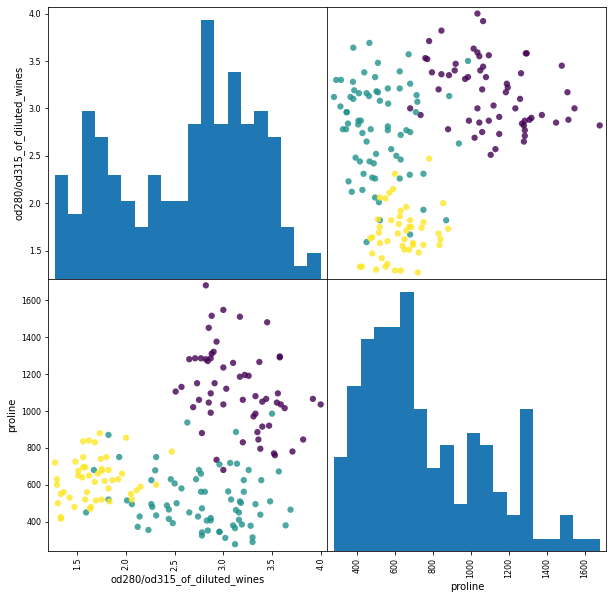

In [145]:
scat_mtrx = pd.plotting.scatter_matrix(data, figsize=(10, 10),c=y, marker='0',
                                      hist_kwds={'bins': 20}, s=40, alpha=.8)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(data, y,  random_state=17)

In [142]:
naive_class = GaussianNB().fit(x_train, y_train)

In [143]:
naive_class.predict_proba(x_test)

array([[4.55643030e-03, 9.95331407e-01, 1.12163193e-04],
       [3.34878821e-04, 9.44207666e-01, 5.54574550e-02],
       [2.42060061e-02, 9.75792816e-01, 1.17832894e-06],
       [9.99981118e-01, 1.88821397e-05, 1.97555573e-14],
       [7.64387354e-07, 3.03391028e-02, 9.69660133e-01],
       [3.59472605e-08, 2.60085341e-02, 9.73991430e-01],
       [9.99939622e-01, 6.03742268e-05, 3.47212854e-09],
       [7.80079423e-03, 9.92190332e-01, 8.87382526e-06],
       [1.24951712e-05, 1.83803807e-01, 8.16183698e-01],
       [9.95246933e-01, 4.75306670e-03, 7.83248340e-16],
       [1.73433075e-05, 6.38958586e-02, 9.36086798e-01],
       [9.99967281e-01, 3.27189651e-05, 2.02885619e-10],
       [3.18010889e-01, 6.81974877e-01, 1.42343030e-05],
       [1.51163302e-02, 9.50900515e-01, 3.39831544e-02],
       [1.38482003e-07, 7.51530161e-02, 9.24846845e-01],
       [1.81096496e-05, 3.77142793e-02, 9.62267611e-01],
       [2.20600789e-06, 1.03838518e-01, 8.96159276e-01],
       [1.07921167e-03, 8.36145

In [132]:
predictions = naive_class.predict(x_test)
naive_accuracy = accuracy_score(y_test, predictions)
print('Accuracy for naive bayes:', naive_accuracy)

Accuracy for naive bayes: 0.9777777777777777


In [133]:
naive_class.score(x_test, y_test)

0.9777777777777777

## homework by Decision Tree

In [201]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd


In [202]:
load_wine().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [214]:
data = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
split_data = pd.DataFrame(load_wine().data[:, -2:], columns=load_wine().feature_names[-2:])

y = load_wine().target
data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [215]:
split_data.head()

,od280/od315_of_diluted_wines,proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


In [216]:
x_train, x_test, y_train, y_test = train_test_split(data, y, random_state=17)
x2_train, x2_test, y2_train, y2_test = train_test_split(split_data, y, random_state=17)

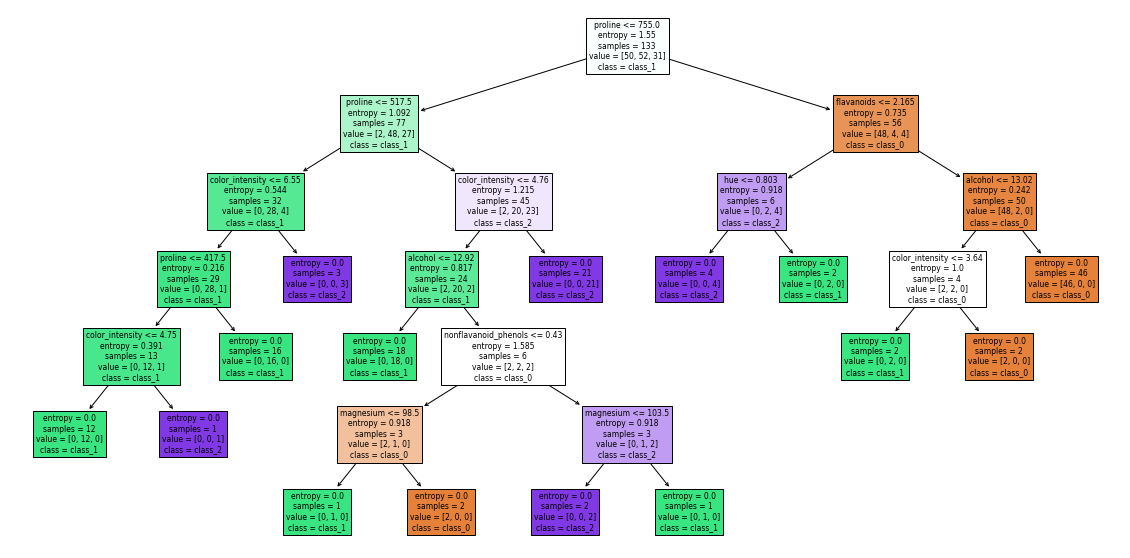

In [217]:
tree_model = DecisionTreeClassifier(criterion='entropy',max_features=2).fit(x_train, y_train)

fig, axe = plt.subplots(figsize=(20,10))
plot_tree(tree_model,
          ax=axe,
          feature_names=data.columns,
          class_names=load_wine().target_names,
       filled=True)


plt.show()

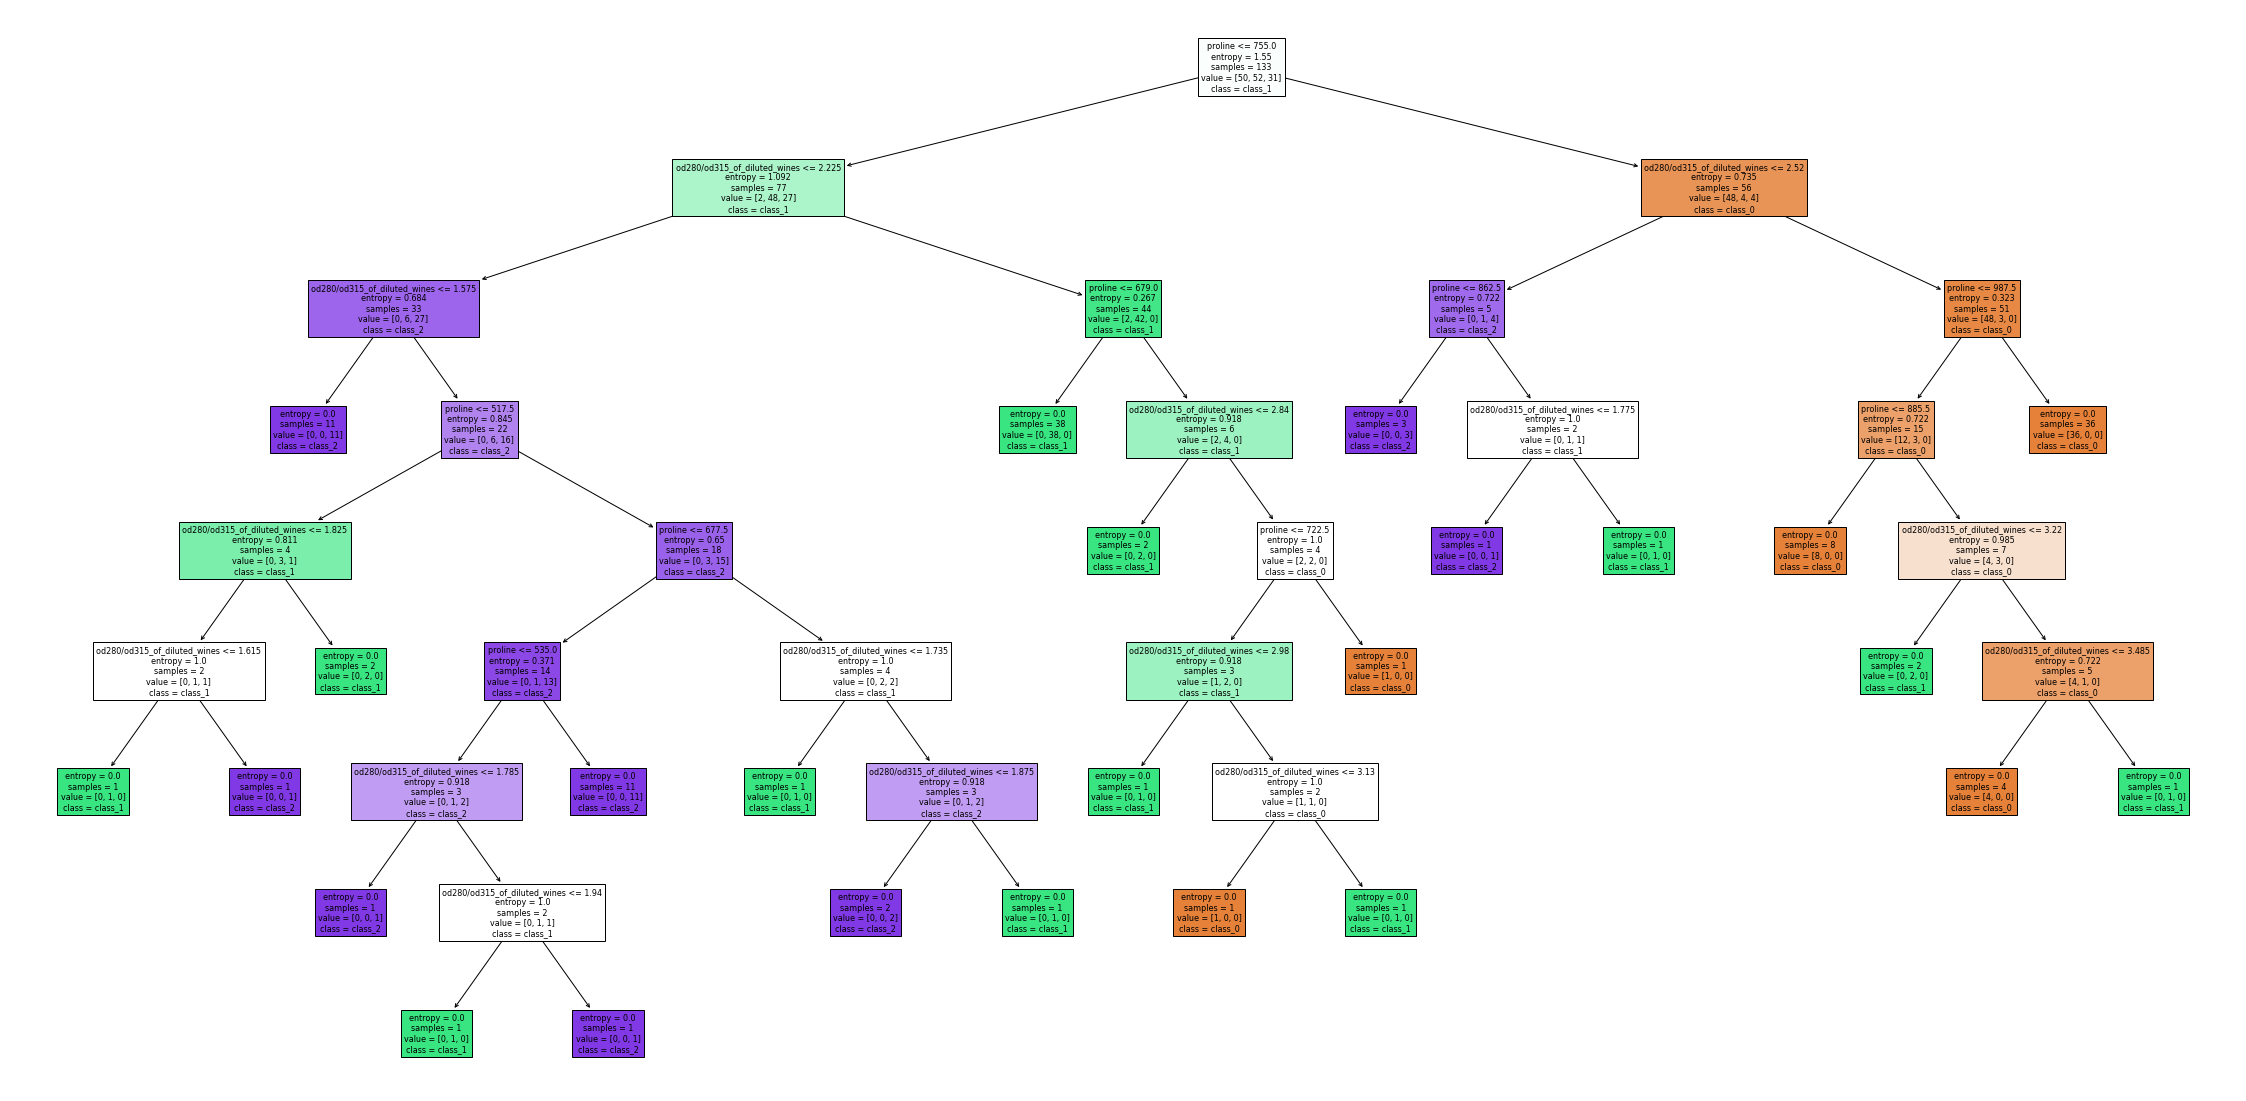

In [218]:
tree_model2 = DecisionTreeClassifier(criterion='entropy').fit(x2_train, y2_train)

fig, axe = plt.subplots(figsize=(40,20))
plot_tree(tree_model2,
          ax=axe,
          feature_names=split_data.columns,
          class_names=load_wine().target_names,
       filled=True)


plt.show()

In [219]:
predictions = tree_model.predict(x_test)
tree_accuracy = accuracy_score(y_test, predictions)
print('Accuracy for tree decision:', tree_accuracy)

Accuracy for tree decision: 0.9111111111111111


In [220]:
predictions2 = tree_model2.predict(x2_test)
tree_accuracy = accuracy_score(y2_test, predictions2)
print('Accuracy for tree decision with two prediction:', tree_accuracy)

Accuracy for tree decision with two prediction: 0.8888888888888888
